## Haris Sumra
## Muscle Builder
## 11/10/2019

### In this Project:
* We are going to take the data from (https://data.cityofnewyork.us/resource/2r9r-m6j4.csv), and choose a variable that is within the data like "boro" and run some aggregation on it. 
* Then I am going to group the ViolationIb by each Borough, to see run the analysis to count the numbers by each Borough.
* Finally, I am going to check to see which Borough takes the longest to close the Violations. 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
df = pd.read_csv("https://data.cityofnewyork.us/resource/wvxf-dwi5.csv")
df.head()

,violationid,buildingid,registrationid,boroid,boro,housenumber,lowhousenumber,highhousenumber,streetname,streetcode,...,novtype,violationstatus,latitude,longitude,communityboard,councildistrict,censustract,bin,bbl,nta
0,10000009,265980,301467,3,BROOKLYN,355,355,355,EAST 48 STREET,36930,...,Original,Close,40.653217,-73.932480,17,41,870,3102071,3046740064,East Flatbush-Farragut
1,10000011,73852,226626,2,BRONX,1123,1123,1123,EAST TREMONT AVENUE,29620,...,Original,Close,40.839954,-73.876599,6,15,220,2042428,2040040009,East Tremont
2,10000012,80102,211704,2,BRONX,751,751,751,GERARD AVENUE,35020,...,Original,Close,40.824692,-73.926605,4,8,63,2002971,2024820030,West Concourse
3,10000014,268639,350942,3,BROOKLYN,54,54,54,EAST 52 STREET,37080,...,Original,Close,40.659731,-73.929295,17,41,878,3099672,3046050019,Prospect Lefferts Gardens-Wingate
4,10000017,268167,300713,3,BROOKLYN,146,146,146,EAST 52 STREET,37080,...,Original,Close,40.657615,-73.929067,17,41,878,3100214,3046210021,Prospect Lefferts Gardens-Wingate


### Check to see what our data looks like. 

In [25]:
df.shape

(1000, 40)

### Making sure that both the Violation ID and Borough has same number of count

In [27]:
df_count = df[['violationid', 'boro']]
df_count.count()

violationid    1000
boro           1000
dtype: int64

### Now I am going to group the ViolationID but the Borough (boro)

In [28]:
df_count.groupby('boro').count()

,violationid
boro,
BRONX,344
BROOKLYN,363
MANHATTAN,229
QUEENS,62
STATEN ISLAND,2


### For me to run to check which Borough takes the longest to close a Violation, I am going to format to get the delta times

In [30]:
DateofInspection = pd.to_datetime(df['inspectiondate'])
CurrentStatus = pd.to_datetime(df['currentstatusdate'])

### To get how long it takes to close the Violation within a borough, we subtract "CurrentStatus" from "DateofInspection"

In [31]:
df['days_between'] = pd.to_timedelta(CurrentStatus - DateofInspection, unit='d').dt.days
closed_issues = df[df['currentstatus'] == 'VIOLATION CLOSED']

## Finally we can put the perspective to see which Borough takes the longes to close the Violation

In [33]:
daysOpenDf = closed_issues[['days_between', 'boro']]
daysOpenDf.head()

,days_between,boro
0,539,BROOKLYN
1,706,BRONX
2,374,BRONX
3,1042,BROOKLYN
4,356,BROOKLYN


## To make it easier for a viewer, we can bar chart our analysis to see how long it takes to close a Vilation in Bar Chart

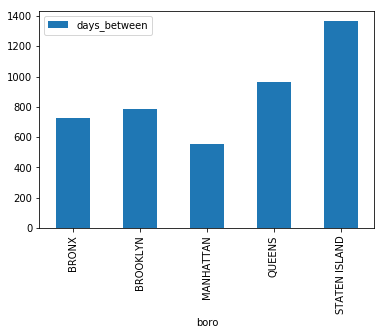

In [35]:
StatusChart = daysOpenDf.groupby('boro').median()
StatusChart.plot.bar()